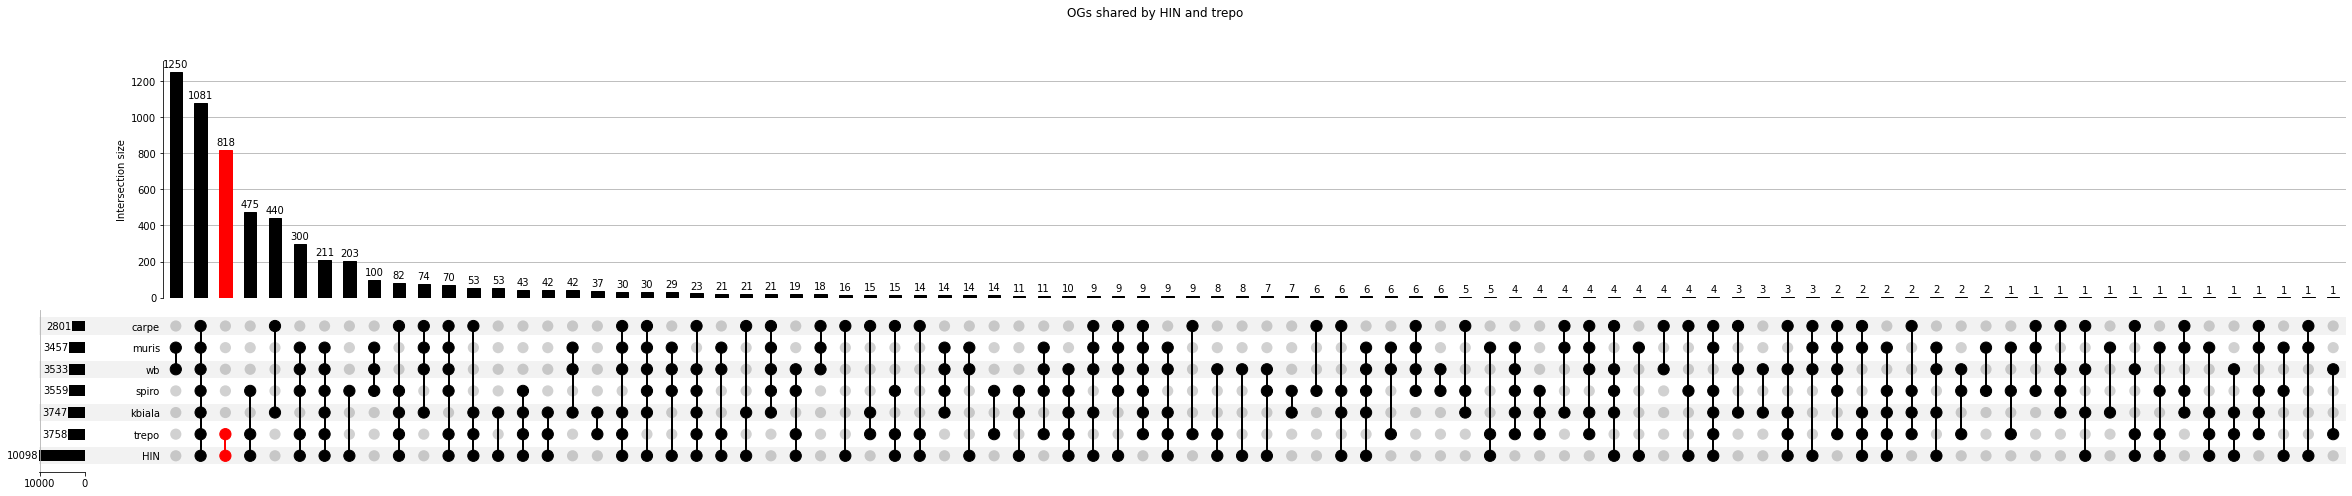

In [16]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG, singletons are excluded"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).\
    set_index(df_count.spiro >= 1, append=True).\
    set_index(df_count.wb >= 1, append=True).\
    set_index(df_count.muris >= 1, append=True).\
    set_index(df_count.trepo >= 1, append=True).\
    set_index(df_count.kbiala >= 1, append=True).\
    set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["kbiala", "carpe", "spiro", "wb", "muris"],
                facecolor="red")

upset.plot()
plt.suptitle("OGs shared by HIN and trepo")
plt.show()

In [54]:
"OG shared by HIN and trepo"
df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_hin_trepo = df[(df.iloc[:,[1,2]] >=1).all(1)  & (df.iloc[:,[3,4,5,6,7]] ==0).all(1)]

print("Number of OGs= ", len(og_hin_trepo["Orthogroup"]))
print("Total trepo genes =", og_hin_trepo["trepo"].sum())
print("Total HIN genes =", og_hin_trepo["HIN"].sum())

og_hin_trepo.head()

Number of OGs=  818
Total trepo genes = 1065
Total HIN genes = 5284


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
4,OG0000004,511,1,0,0,0,0,0,512
23,OG0000023,251,1,0,0,0,0,0,252
59,OG0000059,123,1,0,0,0,0,0,124
100,OG0000100,86,1,0,0,0,0,0,87
127,OG0000127,73,1,0,0,0,0,0,74


In [55]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df

extract_prot(og_hin_trepo).T.head()

,OG0000004,OG0000023,OG0000059,OG0000100,OG0000127,OG0000196,OG0000205,OG0000243,OG0000248,OG0000268,...,OG0011092,OG0011094,OG0011225,OG0011482,OG0011544,OG0011566,OG0011954,OG0012005,OG0012038,OG0012102
1,HIN_000231,HIN_000578,HIN_000013,HIN_003399,HIN_006645,HIN_005974,HIN_000117,HIN_000009,HIN_002237,HIN_000532,...,HIN_003810,HIN_003959,HIN_010209,HIN_024132,HIN_030568,HIN_031999,HIN_066393,HIN_071741,HIN_075944,HIN_086297
2,HIN_000254,HIN_000728,HIN_000833,HIN_004589,HIN_009425,HIN_005975,HIN_000139,HIN_002681,HIN_002241,HIN_000533,...,TPC1_13645,TPC1_15240,TPC1_10655,TPC1_20131,TPC1_30670,TPC1_17531,TPC1_30637,TPC1_13279,TPC1_12200,TPC1_17826
3,HIN_000347,HIN_000734,HIN_001354,HIN_004605,HIN_009446,HIN_007056,HIN_000183,HIN_002704,HIN_005533,HIN_000551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIN_000529,HIN_000736,HIN_003469,HIN_004607,HIN_014024,HIN_009466,HIN_009140,HIN_013515,HIN_005547,HIN_002328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIN_000530,HIN_000740,HIN_004966,HIN_008568,HIN_016905,HIN_009486,HIN_009222,HIN_022398,HIN_015215,HIN_002329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
